# Setup: Installing packages and getting my bearings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import datetime as datetime
import random as random
import seaborn as sns
import plotly as py

General note to self:
If PyCharm asks for Jupyter notebook token, try "jupyter notebook list" in terminal and copy down the string after "token=".

In [4]:
# Check the current working directory - where am I?
import os
os.getcwd()

'/Users/Shu/PycharmProjects/spring2019-solo-project-shuzhang96'

# Chicago Crime Dataset

Background thoughts: At the beginning of the class, I vowed to make a super cool project - something that might not be especially practical but that would be challenging and fun. However, my goals were slowly squashed as other things began to pile up on my plate. And about a month ago, I realized that I was running short on both time and creativity. Ideally I would've worked on something I could actually use in my lab at the NIH, but my lab conducts fairly non-computational research - i.e. we do mostly bench work. Sometimes data needs to be analyzed, and this is done on the computer in programs like Excel and Prism, but no particular assay I did was so frequent or followed the same format enough for me to justify making something to conduct the analysis for me. The closest frequent "computer" thing we did was probably checking DNA sequences, but there already exists software for doing that, and I don't think it would've been within my skillset to check for anything other than complete matches. 

So as time was running short, I figured I would find a super cool dataset to analyze and hopefully come to some interesting conclusions. I searched for a while and found some fairly cool datasets (one of them being a huge dataset of the most common tuples in different languages), but some of them were absolutely too big, and frankly not that many really stood out to me. Then I thought about how I am interested in city data, so I looked through the DC open data site as well as the Chicago open data site. Regarding the latter, I went to college in Chicago, so I'm a little more interested in the city than most. 

In the end, I decided to use a dataset that describes incidence of crime in Chicago from 2001 to when I downloaded the dataset, i.e. April 6th, 2019. According to the description, this dataset excludes "murders where data exists for each victim." I'm not sure if this is saying that all murders are excluded; or if there are murders where data exists for each victim and murders where that is not the case, and this dataset only includes one of the two. In looking through the Primary Types of crimes below, I do see a label for "homicide," so maybe it's the latter scenario.

I downloaded the data set from this website that contains data about various things in Chicago: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2. 

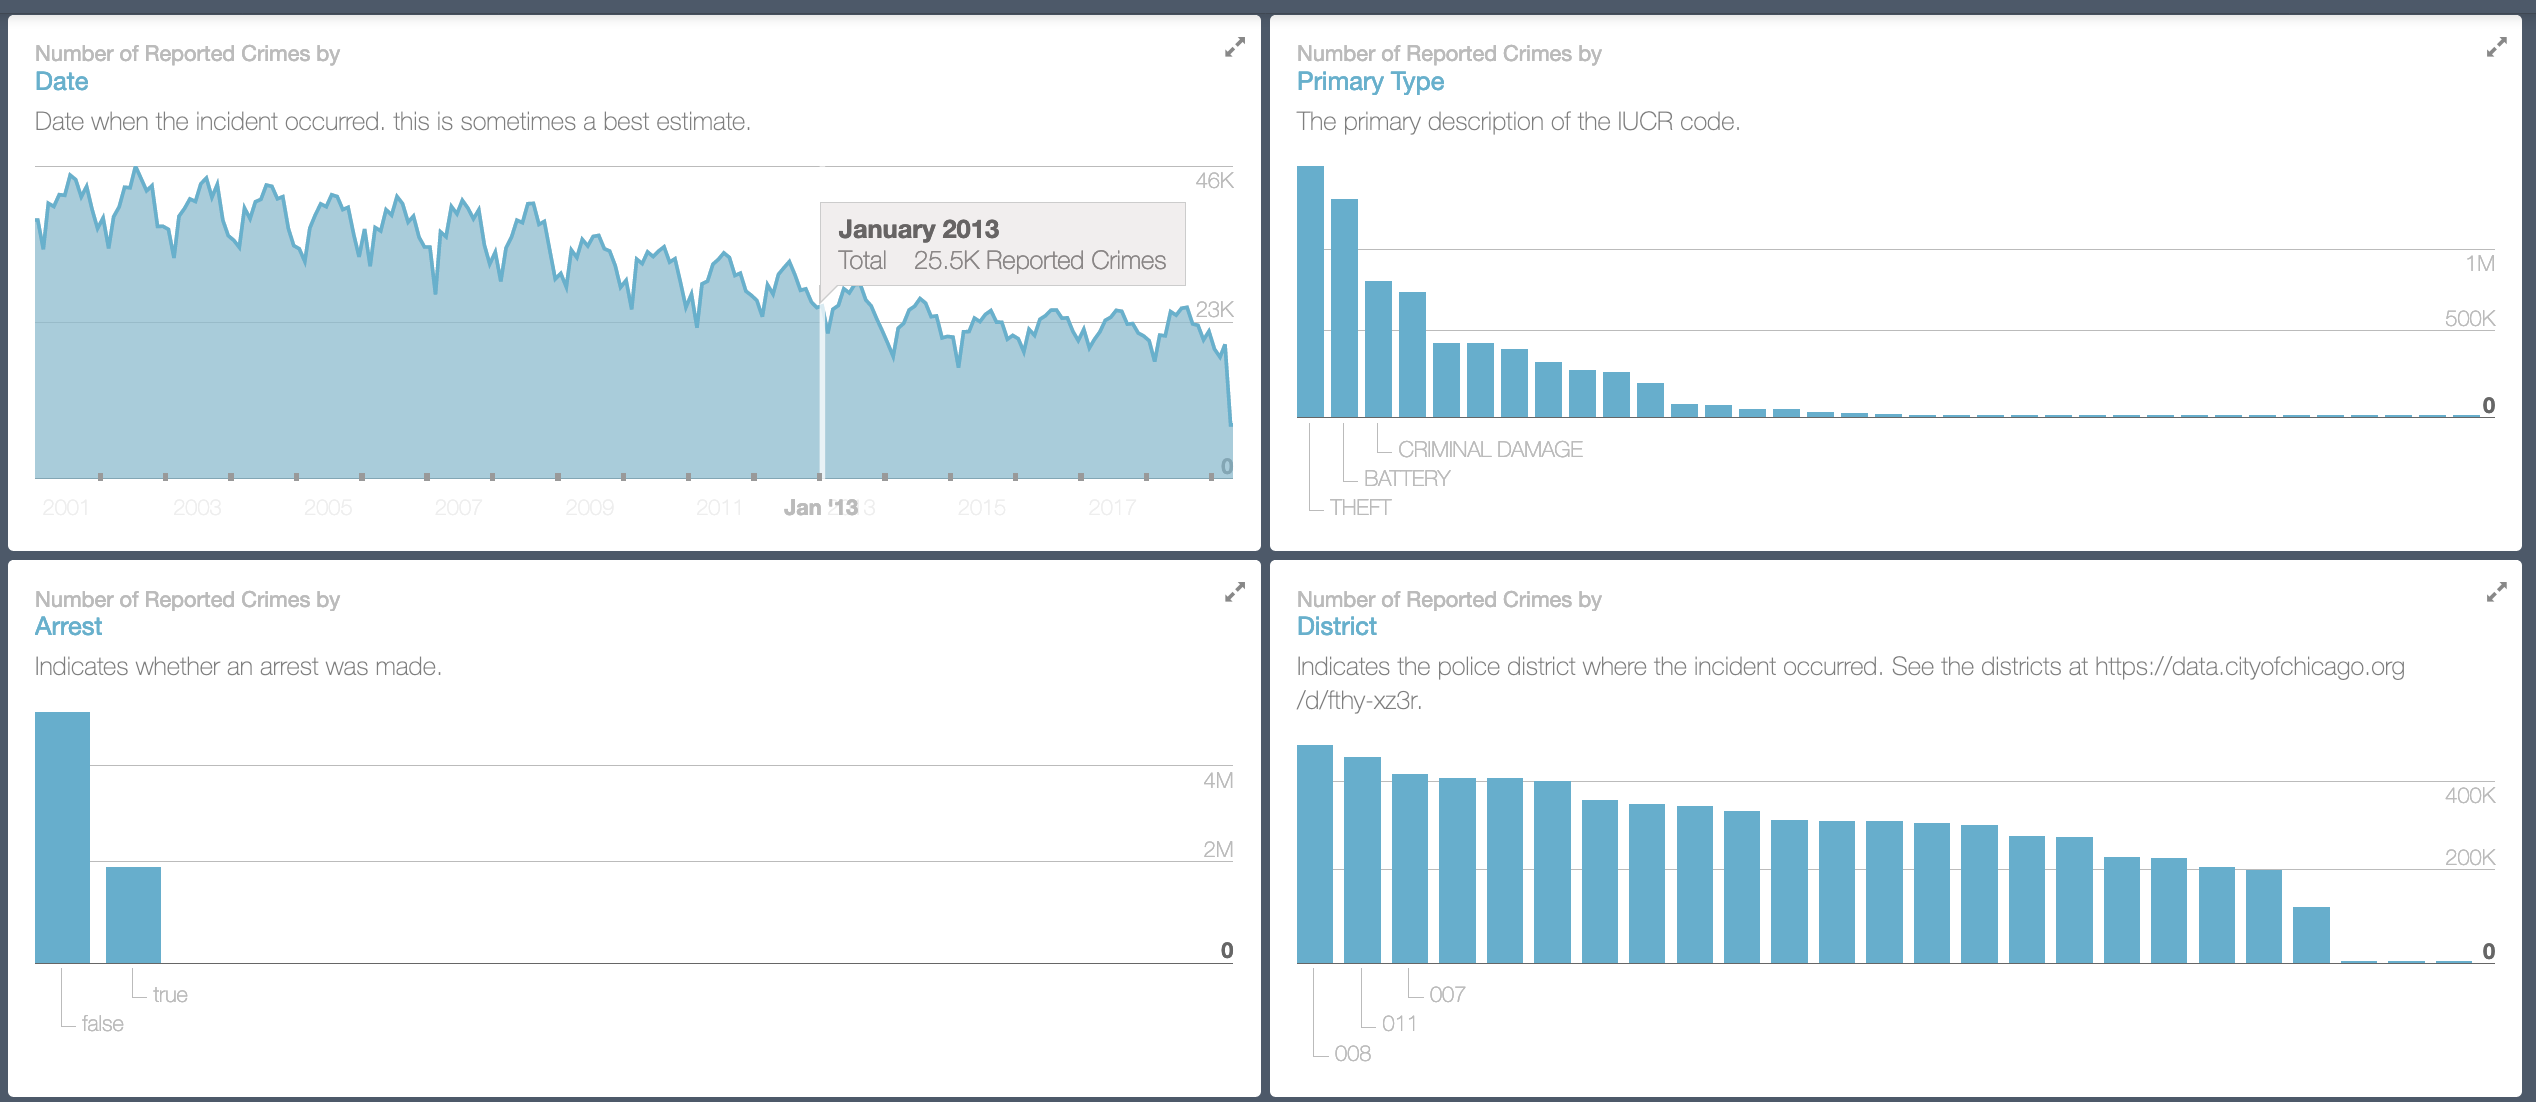

In [133]:
# Before I begin, as an aside, the website where I downloaded the data actually provides some pretty cool interactive graphs of the data (screenshot below). 
Image.open('./Crimedata_screenshot.png')

In [3]:
# Read in the data from where I have it saved in my computer. 
# I could not figure out how to read it from online. Either that, or I never stuck around to find out; it was taking forever to process, maybe because the file was too large.
# Either way, it was far more manageable to read it directly from my computer.

url = '/Users/Shu/PycharmProjects/spring2019-solo-project-shuzhang96/Chicago_crimes_2001_present.csv'
data = pd.read_csv(url)

In [6]:
# Get an idea of what this data looks like, from the first five rows.
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11647131,JC214628,04/06/2019 11:50:00 PM,070XX S BISHOP ST,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESIDENCE,False,True,...,-87.660213,"(41.766286138, -87.660213493)",17.0,22257.0,65.0,284.0,31.0,23.0,17.0,216.0
1,11647074,JC214759,04/06/2019 11:48:00 PM,015XX S STATE ST,0810,THEFT,OVER $500,STREET,False,False,...,-87.627266,"(41.860560022, -87.627266226)",12.0,14913.0,34.0,330.0,9.0,35.0,22.0,94.0
2,11646977,JC214654,04/06/2019 11:47:00 PM,002XX W 103RD ST,1330,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,...,-87.628834,"(41.707095328, -87.628834415)",45.0,21861.0,45.0,569.0,22.0,19.0,10.0,256.0
3,11647124,JC214791,04/06/2019 11:45:00 PM,020XX N KEDVALE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,-87.730243,"(41.917725028, -87.730242872)",27.0,22615.0,21.0,76.0,12.0,2.0,6.0,187.0
4,11647050,JC214665,04/06/2019 11:44:00 PM,041XX W BELMONT AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,...,-87.730240,"(41.939055884, -87.730240399)",7.0,22618.0,16.0,329.0,21.0,21.0,1.0,25.0


In [26]:
# And here's what one entry looks like.
data.iloc[1,:]

ID                                                 11647074
Case Number                                        JC214759
Date                                 04/06/2019 11:48:00 PM
Block                                      015XX S STATE ST
IUCR                                                   0810
Primary Type                                          THEFT
Description                                       OVER $500
Location Description                                 STREET
Arrest                                                False
Domestic                                              False
Beat                                                    131
District                                                  1
Ward                                                      3
Community Area                                           33
FBI Code                                                 06
X Coordinate                                    1.17659e+06
Y Coordinate                            

In [7]:
# By the way, this dataset has 6.8 million lines and the file size is 1.8 GB.
data.shape

(6844979, 30)

There are about two dozen columns in this data. What are they?

Things that I'll plan to look at:
- Date: Day and time that the incident happened.
- Primary Type: General description of the incident (e.g. theft)
- Description: More detailed description of the incident (e.g. retail theft)
- Location Description: Description of the location where the crime happened (e.g. apartment)
- Arrest: Was an arrest made: Y/N?
- Domestic: Was the incident domestic-related as defined by the Illinois Domestic Violence Act?
- Community Area: Community area where the incident occurred.
- Year: Year that the incident occurred.
- Latitude, Longitude: Latitude and Longitude of the location where the incident occurred. This is shifted slightly for privacy.

Things I'm not planning to look at here:
- ID: Unique number assigned to each case. Not sure if there is any meaning to be found here anyway.
- Block: City block where this happened.
- IUCR: Stands for Illinois Uniform Crime Reporting (not the International Union of Crystallography!). Code describing type of incident.
- Beat: Describes beat where the incident occurred. A beat is the smallest police geographic area.
- District: Police district where the incident occurred.
- Ward: City Council district where the incident occurred.
- FBI: FBI's crime classification.
- X,Y Coordinate: X and Y coordinates according to the State Plane Illinois East NAD 1983 projection.
- Updated On: When the data point was last updated.

In [4]:
# Given that I'm going to exclude many of the columns, I'll read in a copy of the data, called 'fdata', that contains only the columns I care about.
fdata = pd.read_csv(url, usecols = ['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Community Area', 'Year', 'Latitude', 'Longitude'])

In [9]:
# Again, let's get an idea of what this looks like.
fdata.head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude
0,04/06/2019 11:50:00 PM,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESIDENCE,False,True,67.0,2019,41.766286,-87.660213
1,04/06/2019 11:48:00 PM,THEFT,OVER $500,STREET,False,False,33.0,2019,41.860560,-87.627266
2,04/06/2019 11:47:00 PM,CRIMINAL TRESPASS,TO LAND,GAS STATION,True,False,49.0,2019,41.707095,-87.628834
3,04/06/2019 11:45:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,20.0,2019,41.917725,-87.730243
4,04/06/2019 11:44:00 PM,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,21.0,2019,41.939056,-87.730240


# Analysis
Now let's answer some basic questions. The rest of this notebook will be dedicated to this purpose. It admittedly involves a rather humble use of Python, but I find that I am usually more interested in Python as a tool than as a powerful programming language. So even though the usage below is quite simplistic, it is probably realistically the type of thing I would use Python for.

In [31]:
# 1a. How many crimes happen per day?

# There are 6669 days between January 1st, 2001, the first day of the dataset, and April 6th, 2019, the last day of the dataset.
days = (datetime.date(2019, 04, 06) - datetime.date(2001, 01, 01)).days

# The dataset is 6844979 rows long by the longest count. 
# I think there are some NaN's for some of the columns, which is why there are different values depending on which column you count.
crimes = fdata.count(0)

# Thus we can divide the two numbers: crimes by days:
crimes/days

# Taking the largest number, aproximately 1026 crimes happen per day on average. I don't know what would be typical, but that seems like quite a lot!

Date                    1026.387614
Primary Type            1026.387614
Description             1026.387614
Location Description    1025.670865
Arrest                  1026.387614
Domestic                1026.387614
Community Area           934.393612
Year                    1026.387614
Latitude                1016.844504
Longitude               1016.844504
dtype: float64

In [51]:
# 1b. Another way to look at it is: how many crimes happen per day per community area? (Community areas, which are described more below, are big subdivisions of Chicago.)
# There are 77 community areas. They all have different sizes and demographis, but when you do this division, ~13 crimes per community area per day seems like a more palatable number.
crimes/days/77

Date                    13.329709
Primary Type            13.329709
Description             13.329709
Location Description    13.320401
Arrest                  13.329709
Domestic                13.329709
Community Area          12.134982
Year                    13.329709
Latitude                13.205773
Longitude               13.205773
dtype: float64

In [ ]:
# 2. What percentage of crimes result in arrest?

# For some quick practice, write a function to make a simple barplot of counts. 
# In this dataset, each row is a unique observation, so we count how many observations there are of each type by simply tallying number of rows.

def barplot(object):
    """ Super simple function to just plot a bar graph. """
    return fdata[object].value_counts(normalize = True).plot(kind = 'bar', title = object, color = 'mediumturquoise')

barplot('Arrest')

# A little less than 30% of crimes result in arrest. 

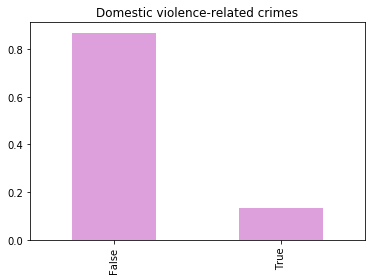

In [43]:
# 3. What percent of crimes are domestic violence-related?

fdata['Domestic'].value_counts(normalize = True).plot(kind = 'bar', title = 'Domestic violence-related crimes', color = 'plum')

# Approximately 15% of incidents are domestic violence related.

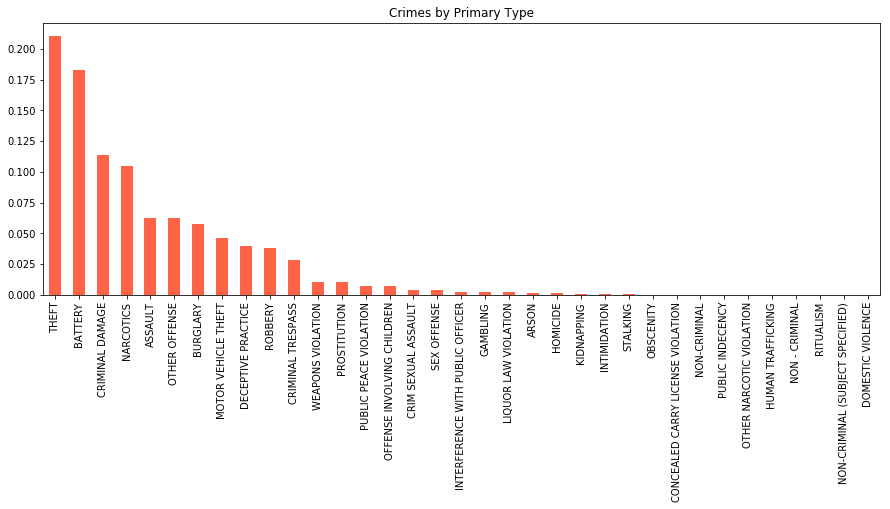

In [52]:
# 4a. What are the most common primary types of crime?

fdata['Primary Type'].value_counts(normalize = True).plot(kind = 'bar', figsize = (15,5), title = 'Crimes by Primary Type', color = 'tomato')

# The most common type of incident is theft (>20%), with battery (~18%) coming in at a close second.
# The next three most common are: criminal damage, narcotics, assault.
# Hey, wait a minute: the dataset seemed to suggest that it excludes 'murders,' but I see 'homicide' in the chart below.
# Maybe this is because of the possible explanation I offered above, about there being two different types of homicide and this datset only including one of them.

In [54]:
# 4b. Another hey, wait a minute: one of the primary types of crime is called "Non-criminal." What does that mean?
# Note that this dataset is named "Chicago Crime Data," but not everything logged in it is a crime!
# First print out all the incident types.
fdata['Primary Type'].value_counts().index.tolist()

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'NARCOTICS',
 'ASSAULT',
 'OTHER OFFENSE',
 'BURGLARY',
 'MOTOR VEHICLE THEFT',
 'DECEPTIVE PRACTICE',
 'ROBBERY',
 'CRIMINAL TRESPASS',
 'WEAPONS VIOLATION',
 'PROSTITUTION',
 'PUBLIC PEACE VIOLATION',
 'OFFENSE INVOLVING CHILDREN',
 'CRIM SEXUAL ASSAULT',
 'SEX OFFENSE',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'GAMBLING',
 'LIQUOR LAW VIOLATION',
 'ARSON',
 'HOMICIDE',
 'KIDNAPPING',
 'INTIMIDATION',
 'STALKING',
 'OBSCENITY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'NON-CRIMINAL',
 'PUBLIC INDECENCY',
 'OTHER NARCOTIC VIOLATION',
 'HUMAN TRAFFICKING',
 'NON - CRIMINAL',
 'RITUALISM',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'DOMESTIC VIOLENCE']

In [55]:
# 4c. Locate just the non-criminal incidents (there are two types).
# It looks like many of these descriptions are relatively innocuous things like "lost passport," where the police may be called but no wrongdoing has occurred.
# So, it may be more accurate to call this a dataset of police-related incidents, and not just crime. 
# Of course, most of the incidents are crime-related, however.
fdata[(fdata['Primary Type'] == 'NON-CRIMINAL') | (fdata['Primary Type'] == 'NON-CRIMINAL (SUBJECT SPECIFIED)')].head()

,Date,Primary Type,Description,Location Description,Arrest,Domestic,Community Area,Year,Latitude,Longitude
47741,01/19/2019 09:30:00 PM,NON-CRIMINAL,FOID - REVOCATION,RESIDENCE,False,False,19.0,2019,41.926017,-87.752360
67563,12/21/2018 08:00:00 AM,NON-CRIMINAL,LOST PASSPORT,APARTMENT,False,False,25.0,2018,41.891896,-87.773626
74831,12/11/2018 09:00:00 AM,NON-CRIMINAL,LOST PASSPORT,RESIDENCE,False,False,19.0,2018,41.924642,-87.767229
89169,11/20/2018 02:00:00 PM,NON-CRIMINAL,LOST PASSPORT,SIDEWALK,False,False,19.0,2018,41.938456,-87.775531
91443,11/16/2018 11:00:00 PM,NON-CRIMINAL,LOST PASSPORT,RESTAURANT,False,False,8.0,2018,41.908850,-87.646646


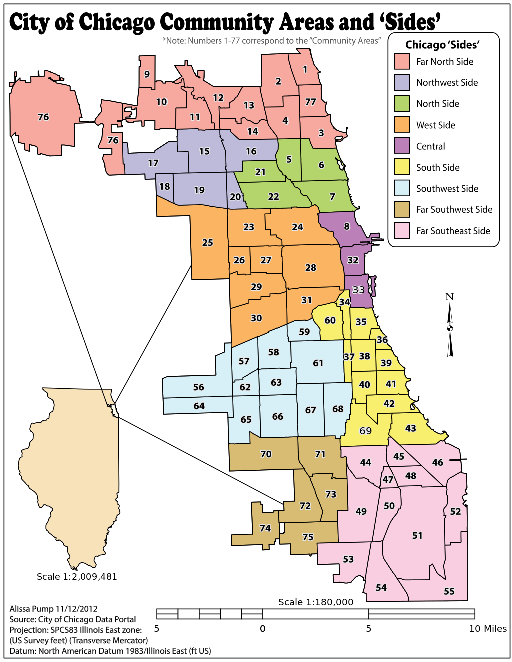

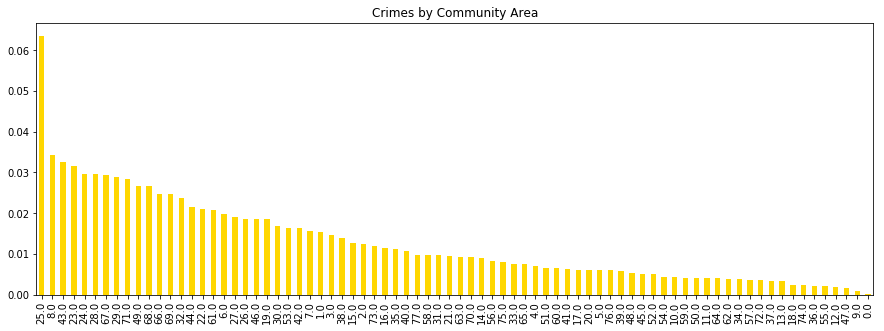

In [46]:
# 5a. Moving on: What is the incidence of crimes by Community Area? More explanation is below this cell.

fdata['Community Area'].value_counts(normalize = True).plot(kind = 'bar', figsize = (15,5), title = 'Crimes by Community Area', color = 'gold')

# To understand this, the following image is helpful:
img = Image.open('./Chicago_community_areas.png')
w, h = img.size 
img.resize((w/2, h/2)) 

There's some more writing here, so I'm going to put it in Markdown instead of code comments.

Chicago is divided into 77 community areas (and these include smaller divisions known as neighborhoods). Their descriptions can be found at https://en.wikipedia.org/wiki/Community_areas_in_Chicago.

Surprisingly, community area #25 by far has the most incidents associated with it, with twice as many as the second place community area. Community area #25 is named Austin, and it contains the neighborhoods of Galewood and The Island. I didn't really hear much (either good or bad) about these neighborhoods when I was in Chicago, and frankly I don't really have any guesses for why this area might have the most incidents.

The community area with the second most incidents is #8, named the Near North Side. It includes the neighborhoods of Gold Coast, Magnificent Mile (aka the main shopping district of downtown Chicago), River North, Streeterville, and some others. In comparison to the neighborhoods in community area #25, I have actually heard of these neighborhoods and know of them as popular places to shop and dine. In fact, if you look at the map, you can see that #8 includes Navy Pier, which is one of the major tourist attractions. I suppose it makes sense there might be more incidents happening here because there is a high density of people, and especially people who might be vulnerable i.e. tourists. I would think that thefts are more common here than in other community areas.

The community area with the fewest incidents is #9, Edison Park. It's in the broader classification known as the Far North Side. I know that in general, the North Side is known to be one of the safer regions of Chicago, and I wonder if this extends to the Far North Side as well.

I went to college in community area #41, named Hyde Park. The number of incidents there seems to be on the lower side (it's about 2/3 down the graph from the left). I wonder if part of this is because my college had a private police force that handled many of the matters on campus, as anecdotally we certainly had our share of muggings.

Additionally, I have heard of the Englewood neighborhood getting a bad rap for crime, particularly homicides. Looking at the Wikipedia page, I see that it is also its own community area: #68. On this graph, it does to be one of the higher-crime community areas.

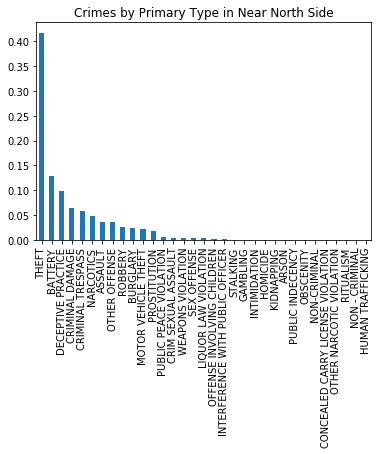

In [58]:
# 5b. Following up on my speculation in the cell above about the Near North Side having a higher incidence of theft than average because it is a touristy area.
# In the graph of crimes by primary type above, incidence of theft was only slightly higher than that of the next most common crime type, battery.
# For community area #8, however, theft is ~3x more common than the next most frequent type of crime (still battery).

data8 = fdata[fdata['Community Area'] == 8]
data8['Primary Type'].value_counts(normalize = True).plot(kind = 'bar', title = 'Crimes by Primary Type in Near North Side')

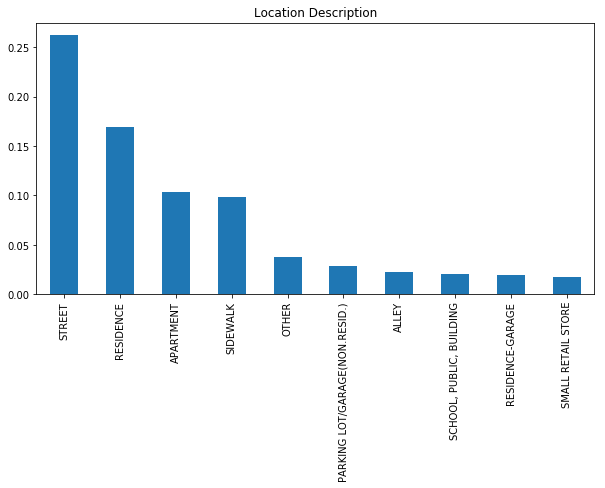

In [59]:
# 6. In what kind of setting do most crimes occur?
fdata['Location Description'].value_counts(normalize = True).head(10).plot(kind = 'bar', figsize = (10,5), title = 'Location Description')

# The most common location is on the street (>25%), then at a residence (~17%) (presumably a residence is a house rather than an apartment).
# Frankly, some of these distinctions are a little unclear to me, e.g. street (#1) vs sidewalk (#4). I'm speculating that street could be on the road itself plus the sidewalk, whereas sidewalk is specifically the sidewalk?

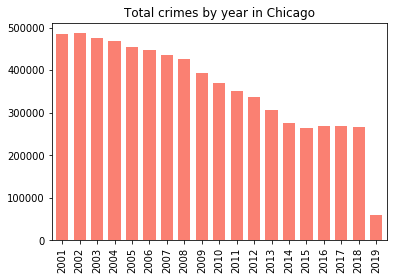

In [61]:
# 7. Globally over the years, what has incidence of crime been in Chicago?
fdata['Year'].value_counts().sort_index().plot.bar(width = 0.7, color = 'salmon', title = 'Total crimes by year in Chicago')

# Encouragingly, total crime incidents seem to have decreased since 2001, with a steady decline from 2001-2013 and then a plateau starting in 2014.
# I wonder what changed in 2014? Or did we just reach the reasonable point and plateau there?
# (Of course, we can also wonder whether something changed in method of measurement and whether simply fewer incidents were reported and logged. But hopefully the apparent decrease in crime is true.)
# The bar for 2019 is low because the year 2019 has not yet completed. 
# However, if we assume that 1/4 of the year has passed (Jan-Mar), then the final count should be 4x the current bar, which would be consistent with values from 2015-2018.

In [21]:
# 8a. At what time of day do most incidents happen?
# The 'Date' column lists date as 'MM/DD/YYYY HH:MM:SS _M'.
# I wanted to split the dates into two strings, day and time: 'MM/DD/YYYY' and 'HH:MM:SS *M'.
# (I did this because I thought I had to to convert the time data to 24 hr time manually, and so I needed to separate the strings. I later realized this was not necessary.)
# However, I tried to do this for the entire dataset and it still hadn't finished running after at least 20 minutes.
# Instead, I did this for a random sample of 10000 rows from the complete data, called 'sdata'.

sdata = fdata.sample(10000, random_state = 123)

# By the way, these 10000 rows compose 1% of the entire dataset. Note to self: need to make one of the numbers in the division a decimal, or Python will return 0 because that is the closest integer.
10000.0/6844979

# Separate into day and time strings: 'MM/DD/YYYY' and 'HH:MM:SS *M'.
sdata[['Day', 'Time']] = sdata['Date'].str.split(' ', 1).apply(pd.Series)

In [22]:
# Write a function for converting the 12 hr time (used in the time string) 'HH:MM:SS *M' format to 24 hr time.

def convert_to_24(time):
    """ Convert 12 hr time (written with AM and PM) to 24 hr time """
    
    # For times that are like 12:30:00 AM that should look like 00:30:00
    if 'AM' in time and time[:2] == '12':
        return '00' + time[2:-3]
    
    # For times like 11:30:00 AM that should look like 11:30:00
    elif 'AM' in time:
        return time[:-3]
        
    # For times like 12:30:00 PM that should look like 12:30:00 
    elif 'PM' in time and time[:2] == '12':
        return time[:-3]
    
    # For times like 3:30:00 PM that should look like 15:30:00 
    else:
        return str(int(time[0:2]) + 12) + time[2:8]
    
# Testing the function
print(convert_to_24("03:30:00 PM")) 

15:30:00


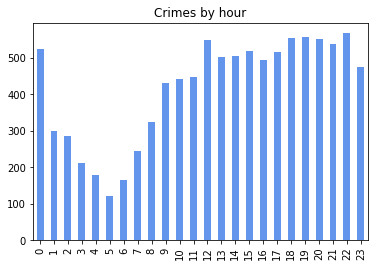

In [23]:
# Convert the 12 hr time to 24 hr time
sdata['Time'].apply(convert_to_24)

# Convert to datetime format.
# (Referring to what I hinted at above, at this time I had not realized that datetime already had the capability to convert 12 hr time to 24hr time, and that I did not need to do it myself.)
# (However, I left my clunkier method as a reminder of how to split strings.)
# Since the 'Time' column used in the rest of this cell does not contain any day information, datetime automatically fills in with today's date.
sdata['Datetime_Time'] = pd.to_datetime(sdata['Time'])

# Extract hour.
sdata['Hour'] = sdata['Datetime_Time'].dt.hour

# Plot number of crimes by hour.
sdata['Hour'].value_counts().sort_index().plot(kind = 'bar', title = 'Crimes by hour', color = 'cornflowerblue')

# According to this subsample of data, crime incidence is lowest at 4-5 AM in the morning and generally increases in frequency up to ~7 PM, after which it then decreases quickly, with a drastic drop-off by 1 AM.
# This is somewhat expected, as few people are probably awake in what I would consider the "deepest" part of the night, around ~3-4 AM.
# Additionally, it kind of makes sense that more people are out and about around "early" nighttime i.e. ~7-8 PM rather than later. 
# Plus, it's generally dark by 8 PM so there's some night cover around that time too. Perhaps that is a happy balance of having people around and having night cover.
# The spike in crime at noon is a bit hard to explain. Maybe it coincides with lunch break?

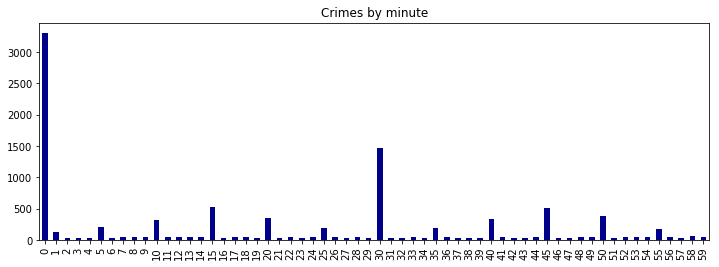

In [24]:
# 8b. How about frequency of crime at the minute level, i.e. is there a minute on the hour that is most popular? One would expect the answer to be no.
sdata['Minute'] = sdata['Datetime_Time'].dt.minute
sdata['Minute'].value_counts().sort_index().plot(kind = 'bar', title = 'Crimes by minute', color = 'darkblue', figsize = (12,4))

# Actually, the result appears to be an artifact of rounding. 
# Most incidents are reported to the nearest hour, with the next most common being the nearest half hour, and then the quarter hour.
# At least, I can say that this intuitively makes sense for how I usually estimate time.
# Some incidents are reported to the exact minute, but we can see that this is much less common. 
# Actually, if we take out the top two bars, the remaining bars create an almost perfectly symmetrical bimodal distribution combined with a constant low-value function.
# I don't know if any of this is actually interesting, but I feel like maybe it says something about how we approximate guesses of time.

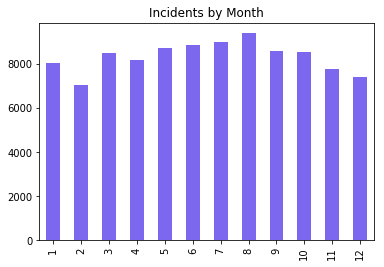

In [86]:
# 8c. Are there months during which incidents are more common?

sdata['Datetime_Day'] = pd.to_datetime(sdata['Day'])
sdata['Month'] = sdata['Datetime_Day'].dt.month
sdata['Month'].value_counts().sort_index().plot(kind = 'bar', title = 'Incidents by Month', color = 'mediumslateblue')

# Overall, the month-to-month differences aren't huge. 
# However, the months with the most incidents are July-August, and the months with the fewest incidents are December and February.
# This overall appears to make sense, since fewer people are out during the colder months, meaning there are fewer people to be victims or perpetrators, and vice versa.

In [92]:
# 9a. Let's just briefly repeat this for just the year 2018, the last year for which the data is complete.
# Taking out just the rows for year 2018.

fdata2018 = fdata[fdata['Year'] == 2018]

In [93]:
# As mentioned above, I later learned that datetime is smart enough to convert 12 hr to 24 hr time, meaning that there was no need for me to do the conversion myself, nor any need to split the 'Date' column name into two strings.
# So, this time I am using the simpler method where I don't do those extra steps.

# Apply datetime function
fdata2018['Datetime'] = pd.to_datetime(fdata2018['Date'])

/Users/Shu/anaconda3/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


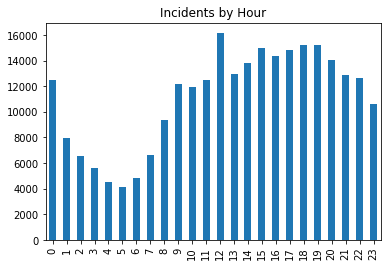

In [94]:
# 9b. Crime by hour
fdata2018['Datetime'].dt.hour.value_counts().sort_index().plot(kind = 'bar', title = 'Incidents by Hour')

# Results are similar. 

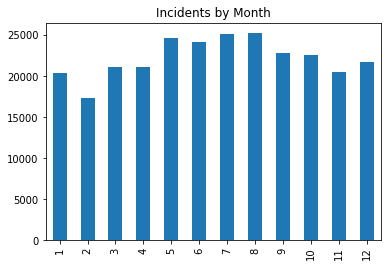

In [96]:
# 9c. Crime by month
fdata2018['Datetime'].dt.month.value_counts().sort_index().plot(kind = 'bar', title = 'Incidents by Month')

# Also a similar trend. 
# From these few graphs, it looks like using the 1% random sample of the 2001-early 2019 data I used above was actually quite similar to the full data from 2018. 
# Since it runs more quickly, I'll use sdata for future graphs.

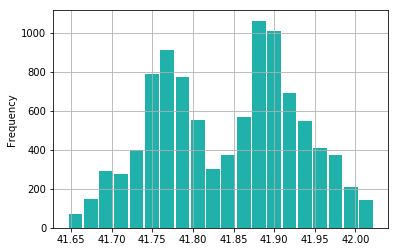

In [46]:
# 10a. How about longitude and latitude information?

# Plot a histogram of latitude.
lldata = sdata[(sdata['Latitude'] > 41.65) | (sdata['Longitude'] > -87.9)]
lldata['Latitude'].plot.hist(grid=True, bins=20, rwidth=0.9, color='lightseagreen')

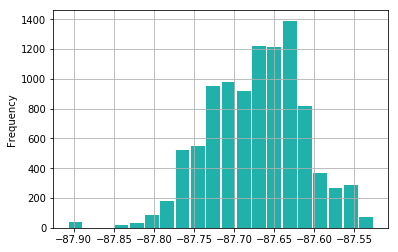

In [47]:
# Plot a histogram of longitude.
lldata['Longitude'].plot.hist(grid=True, bins=20, rwidth=0.9, color='lightseagreen')

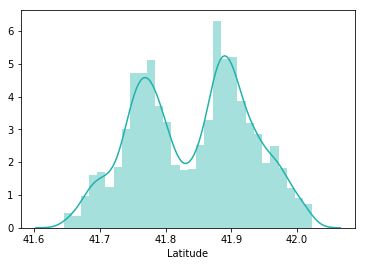

In [51]:
sns.distplot(lldata['Latitude'], color = 'lightseagreen')

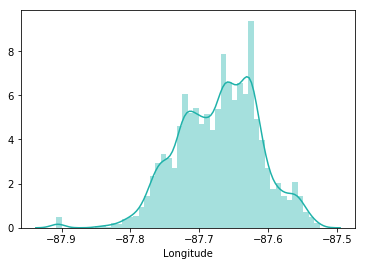

In [52]:
sns.distplot(lldata['Longitude'], color = 'lightseagreen')

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,  40.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   2.,   4.,  11.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,  15.,   4.,   5.,   4.,   3.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   4.,   4.,   2.,   0.,   0.,
           0.,   0.,   2.,  22.,  24.,  12.,  12.,   5.,   2.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   4.,  21.,   1.,   0.,   0.,
           2.,   0.,  15.,  47.,  43.,  21.,  14.,  15.,   0.],
        [  0.,   0.,   0., 

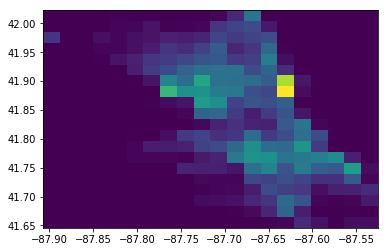

In [42]:
plt.hist2d(np.array(lldata['Longitude']), np.array(lldata['Latitude']), bins = 20)

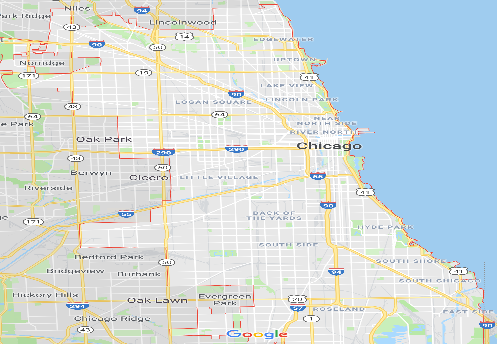

In [371]:
img2 = Image.open('./Chicago_map.png')
w, h = img2.size 
img2.resize((w/2, h/4))

I wanted to try making a histogram, but I just realized that I do not have tallying numbers anywhere in my dataset and I have been relying on the 'value_counts' method to do this for me. In short, I think my dataset is in what is called long format. So, I would like to convert it to wide format.

In [338]:
ydata = []
for i in range(2001, 2019):
    count = len(sdata[sdata['Year'] == i])
    ydata.append(count)
ydata

[730,
 675,
 735,
 717,
 694,
 657,
 659,
 589,
 593,
 522,
 457,
 464,
 439,
 378,
 403,
 418,
 378,
 404]

In [ ]:
df.pivot(index='Year', columns='obs', values='score')

In [329]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [331]:

test = sdata.pivot('Month', 'Year', 'Community Area')
ax = sns.heatmap(test)

ValueError: Index contains duplicate entries, cannot reshape

# Summary

This project aimed to break down crime / police-related incidents in Chicago from 2001 to early 2019, by factors such as incident type, location, etc. Although far from the most powerful use of python, simple data analysis is probably the most likely application for which I might use Python in the future. (Tentatively, I guess my main long-term goal would be to do statistical analysis for clinical data.) My previous experience has been some basic knowledge of R (enough to make decent graphs and do linear regression) and Stata (also in linear regression, just because my stats classes used both R and Stata). It seems kind of strange to learn how to do much of the same in Python, but maybe this will open the door to learning how to do more complex stuff that can only be done in a "real" programming language like Python.

### Takeaways from the Chicago Crime Data:
- Incidence of crime tends to peak with amount of human activity.
- The most common type of crime is theft.
- 

### What I learned:
- How to actually run Python! I had downloaded it previously but didn't know about IDEs or how to use it. Having a class helped provide the activation energy to actually use the language.
- A tiny bit of what GitHub is. I still don't really get it, nor the frequently obtuse lingo, but I'm better off than when I started.
- Probably not true for everyone, but even the simplest thing can require extensive Googling. Sometimes it takes a mountain to move just a foot.